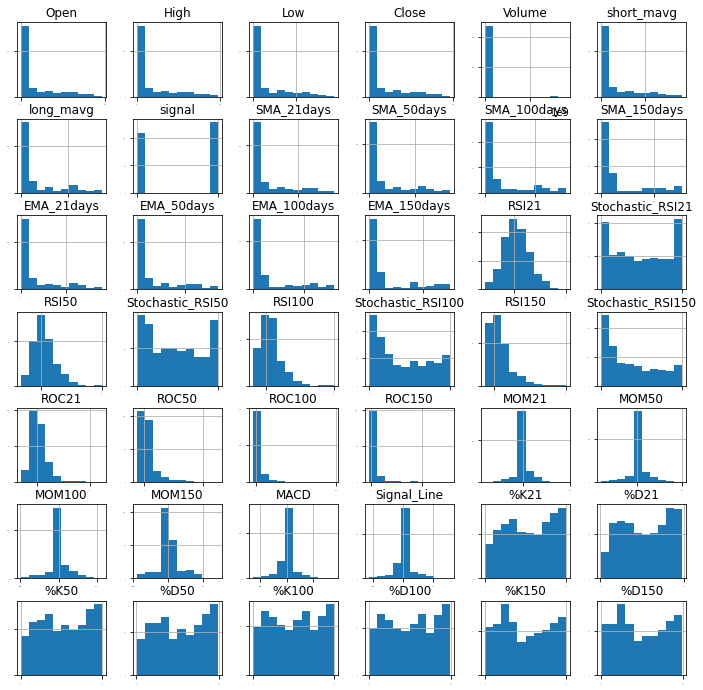

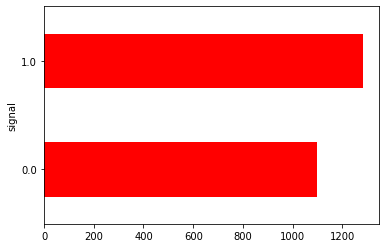

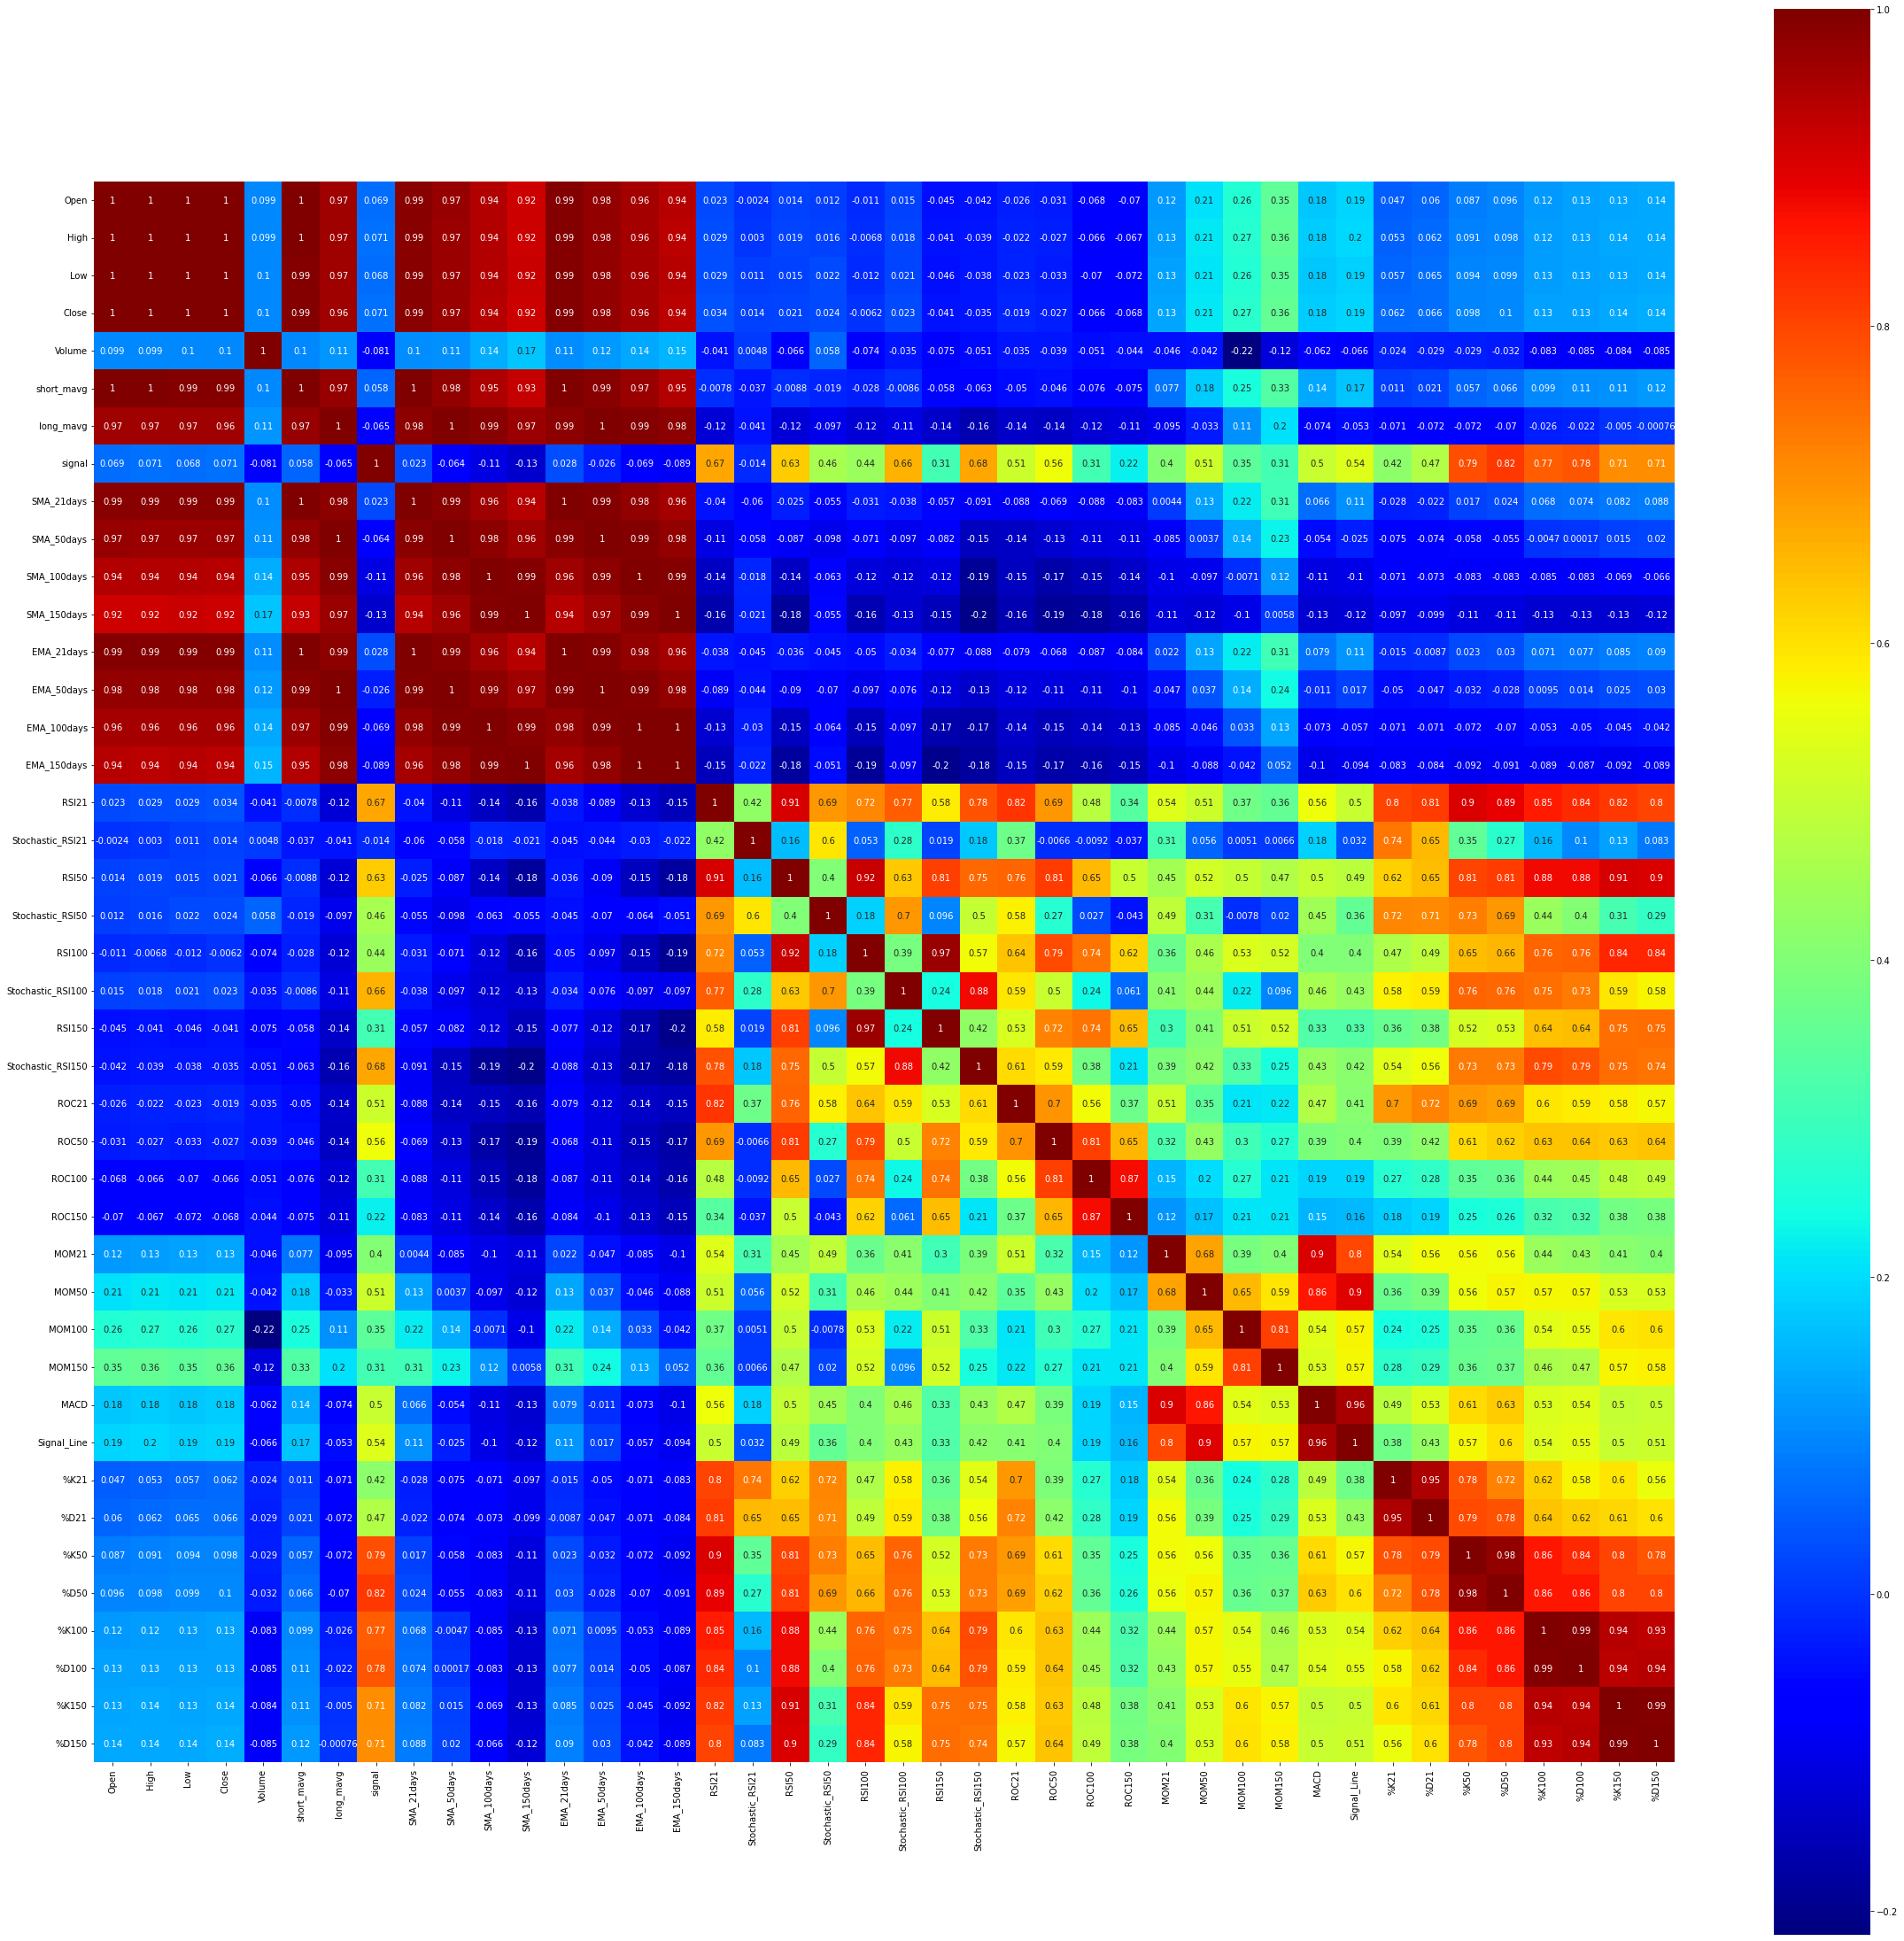

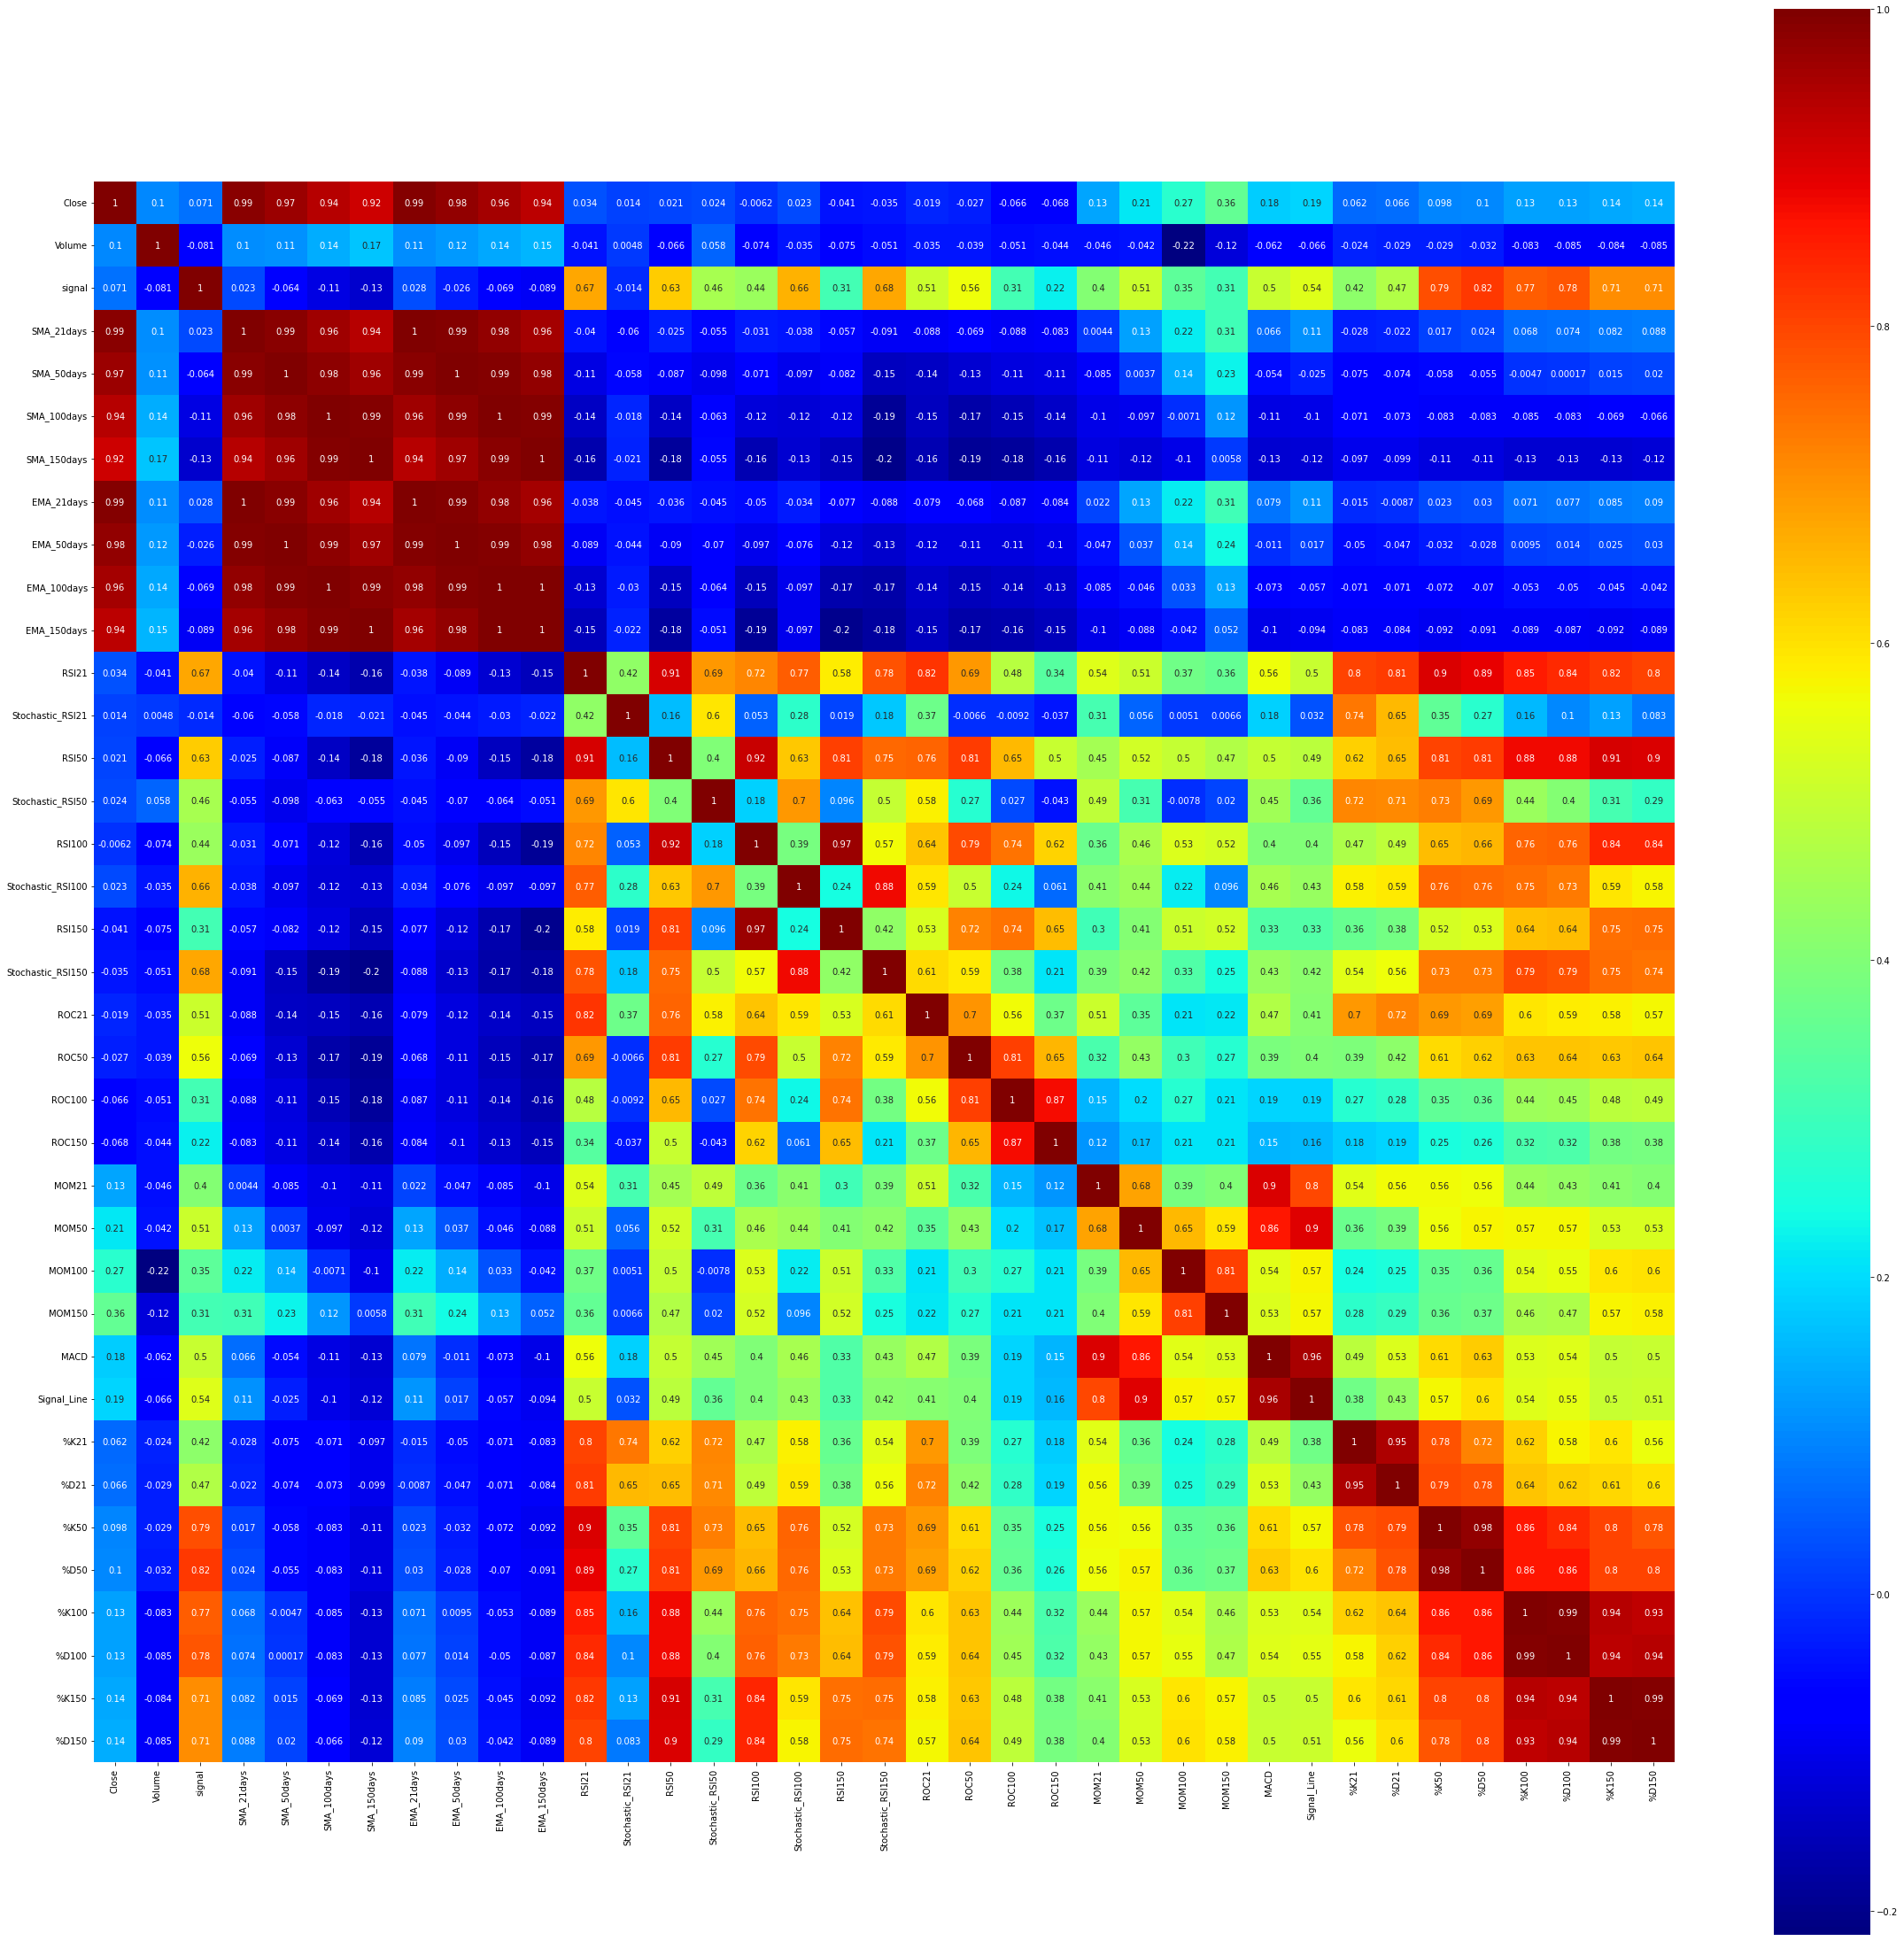

LR: 0.545238 (0.161218)
KNN: 0.529789 (0.043697)
CART: 0.974091 (0.010828)
LDA: 0.952369 (0.015206)
NN: 0.596287 (0.058933)
AB: 0.975495 (0.010467)
GBM: 0.975495 (0.011779)
RF: 0.978287 (0.009597)
ETC: 0.975495 (0.009988)
SVC: 0.538225 (0.038148)
NB: 0.537541 (0.037241)
Saving figure ETH prediction - Models Evaluation


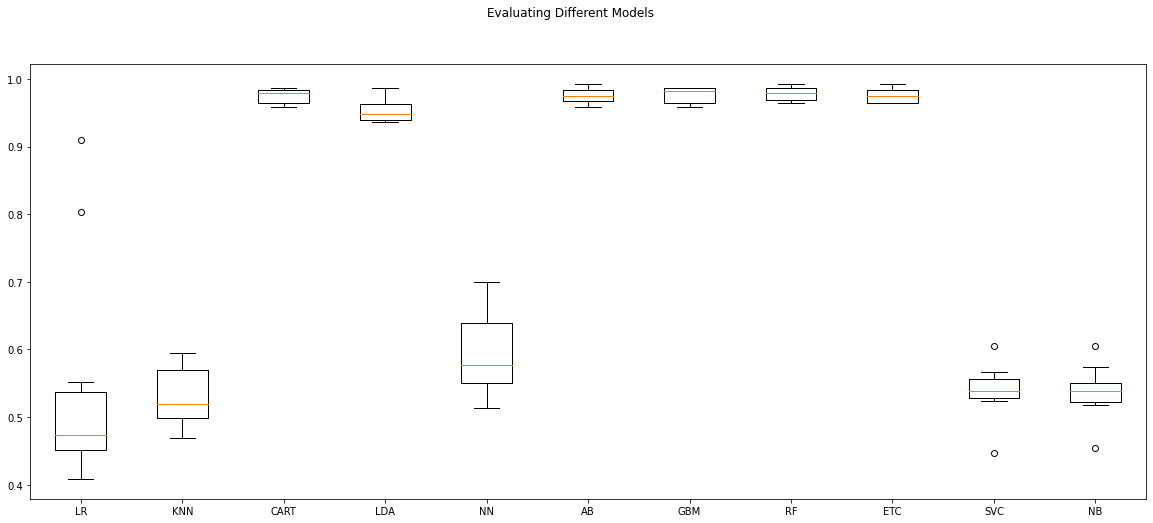

Best: 0.979691 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#4 0.978292 (0.011875) with {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#7 0.975490 (0.013341) with {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#1 0.979691 (0.012283) with {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#5 0.977593 (0.010260) with {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#2 0.979681 (0.008531) with {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#8 0.974791 (0.015366) with {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#6 0.976889 (0.014344) with {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#3 0.978991 (0.009876) with {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
0.9831932773109243
[[158   1]
 [  5 193]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       159
         1.0       0.99      0.97      0.98       198

    accura

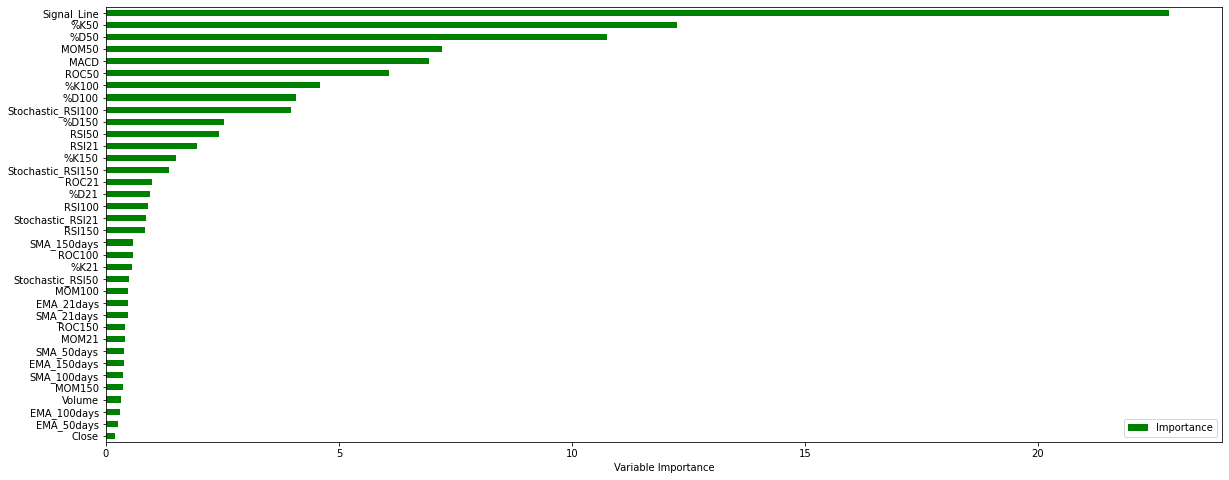

Saving figure Backtest - strat return vs actual return histogram


<Figure size 432x288 with 0 Axes>

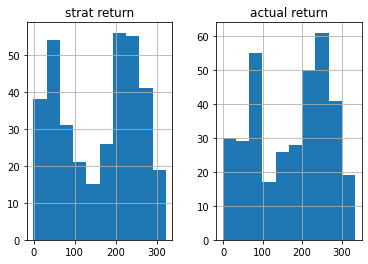

Saving figure Backtest - strat return vs actual return


<Figure size 432x288 with 0 Axes>

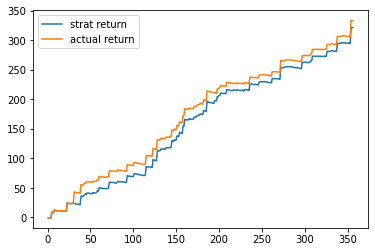

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [117]:
%run ETH_predictor.ipynb

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import os

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

from ipywidgets import interactive, fixed

In [119]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [120]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [121]:
df = df #since we're running it from another ipynb file, luckily I already featured engineered, so no need to clean

### Train Test Split

In [122]:
val_size = 0.2
seed = 42
val = int(df.shape[0]*0.8)
subset = df.iloc[-val:]
X = subset.loc[:, df.columns != 'signal']
y = subset['signal']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=val_size, random_state=seed)

### Standardization

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
rs_df = pd.DataFrame(X_scaled, columns = X_train.columns, index=X_train.index)

X_train.dropna(how='any', inplace=True)
rs_df.dropna(how='any', inplace=True)

In [124]:
rs_df.shape

(1427, 36)

### Dimensionality Reduction --- Singular Value Decomposition (SVD)

In [125]:
ncomps = 10
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(rs_df)

In [126]:
svd.components_[0]

array([ 0.05142018, -0.01951845,  0.02597568,  0.00026193, -0.02020556,
       -0.03065037,  0.02804086,  0.0071713 , -0.01198434, -0.02328542,
        0.23114537,  0.07154975,  0.23700199,  0.13705761,  0.21977132,
        0.1771594 ,  0.20458295,  0.19191801,  0.1964885 ,  0.2114074 ,
        0.17901659,  0.1732605 ,  0.17073126,  0.18564739,  0.15782843,
        0.15067033,  0.19256414,  0.18603437,  0.18090463,  0.18797191,
        0.22407695,  0.22484746,  0.22830255,  0.22679983,  0.22544726,
        0.22373961])

Saving figure Explained Variance Ratio by Top 10 factors
Saving figure Cumulative Explained Variance by factor


,Explained Variance
0,44.96%
1,70.10%
2,79.69%
3,84.99%
4,88.81%
5,91.67%
6,93.53%
7,94.74%
8,95.71%
9,96.59%


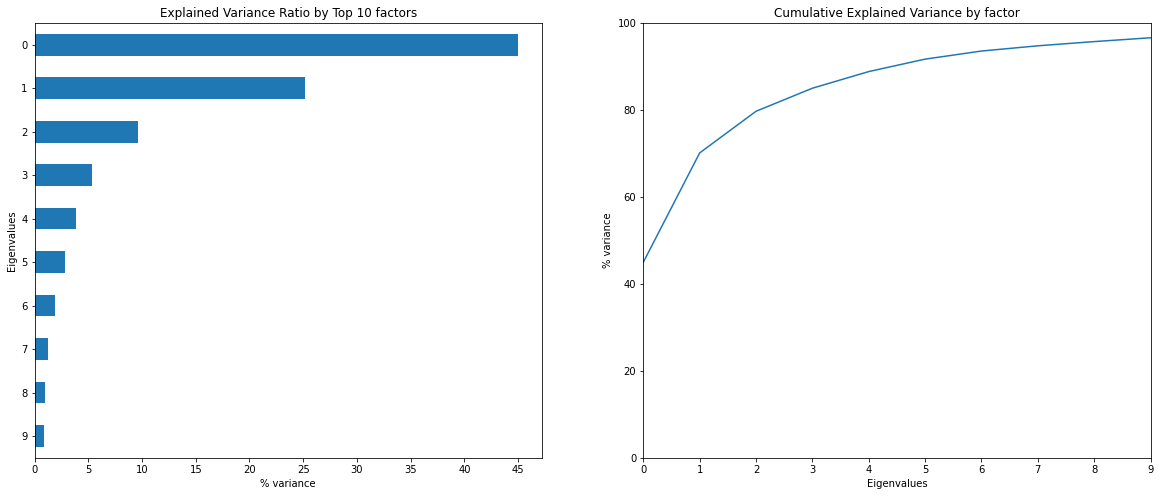

In [127]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(20,8))
Series1 = pd.Series(svd.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(svd.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0])
ax1 = Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0])
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('% variance')
ax1.set_ylabel('Eigenvalues')
save_fig('Explained Variance Ratio by Top 10 factors',tight_layout=False)
ax2 = Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlabel('Eigenvalues')
ax2.set_ylabel('% variance')
save_fig('Cumulative Explained Variance by factor',tight_layout=False)
# explained_variance
pd.Series(np.cumsum(svd.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [128]:
rs_df.shape

(1427, 36)

Can preserve 95% variance from 8 Eigenvalues compared to the 36 features

In [129]:
y_pred = svd.fit_transform(rs_df)

In [130]:
svd_df = pd.DataFrame(y_pred, columns=['c{}'.format(c) for c in range(ncomps)], index=rs_df.index)

In [131]:
svd_df.shape

(1427, 10)

In [132]:
svd_df.head(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
1893,8.097160,4.667341,-2.744206,5.709687,0.815699,0.676327,-0.799521,-0.091144,-0.539613,-1.073241
772,-0.490134,-1.431972,2.757787,0.981258,-2.580061,0.326693,-0.820358,-0.558086,0.009700,-1.105896
1483,-2.876901,-2.269778,0.255056,0.987609,-1.522251,0.015342,0.443099,0.805446,-0.496891,-0.205103
2200,-0.458357,4.247005,4.330715,0.022210,-0.125072,-0.053022,-1.190840,0.187276,0.369509,1.065863
1078,1.421294,-3.068771,3.215226,-0.571294,0.217673,-0.794815,0.954006,0.478001,0.197687,-0.872584


### Visualize the compressed dataset... from top 5 component of SVD

In [133]:
[c for c in svd_df.columns if c[0] == 'c']

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [134]:
compressed_df_cols = [c for c in svd_df.columns if c[0] == 'c']

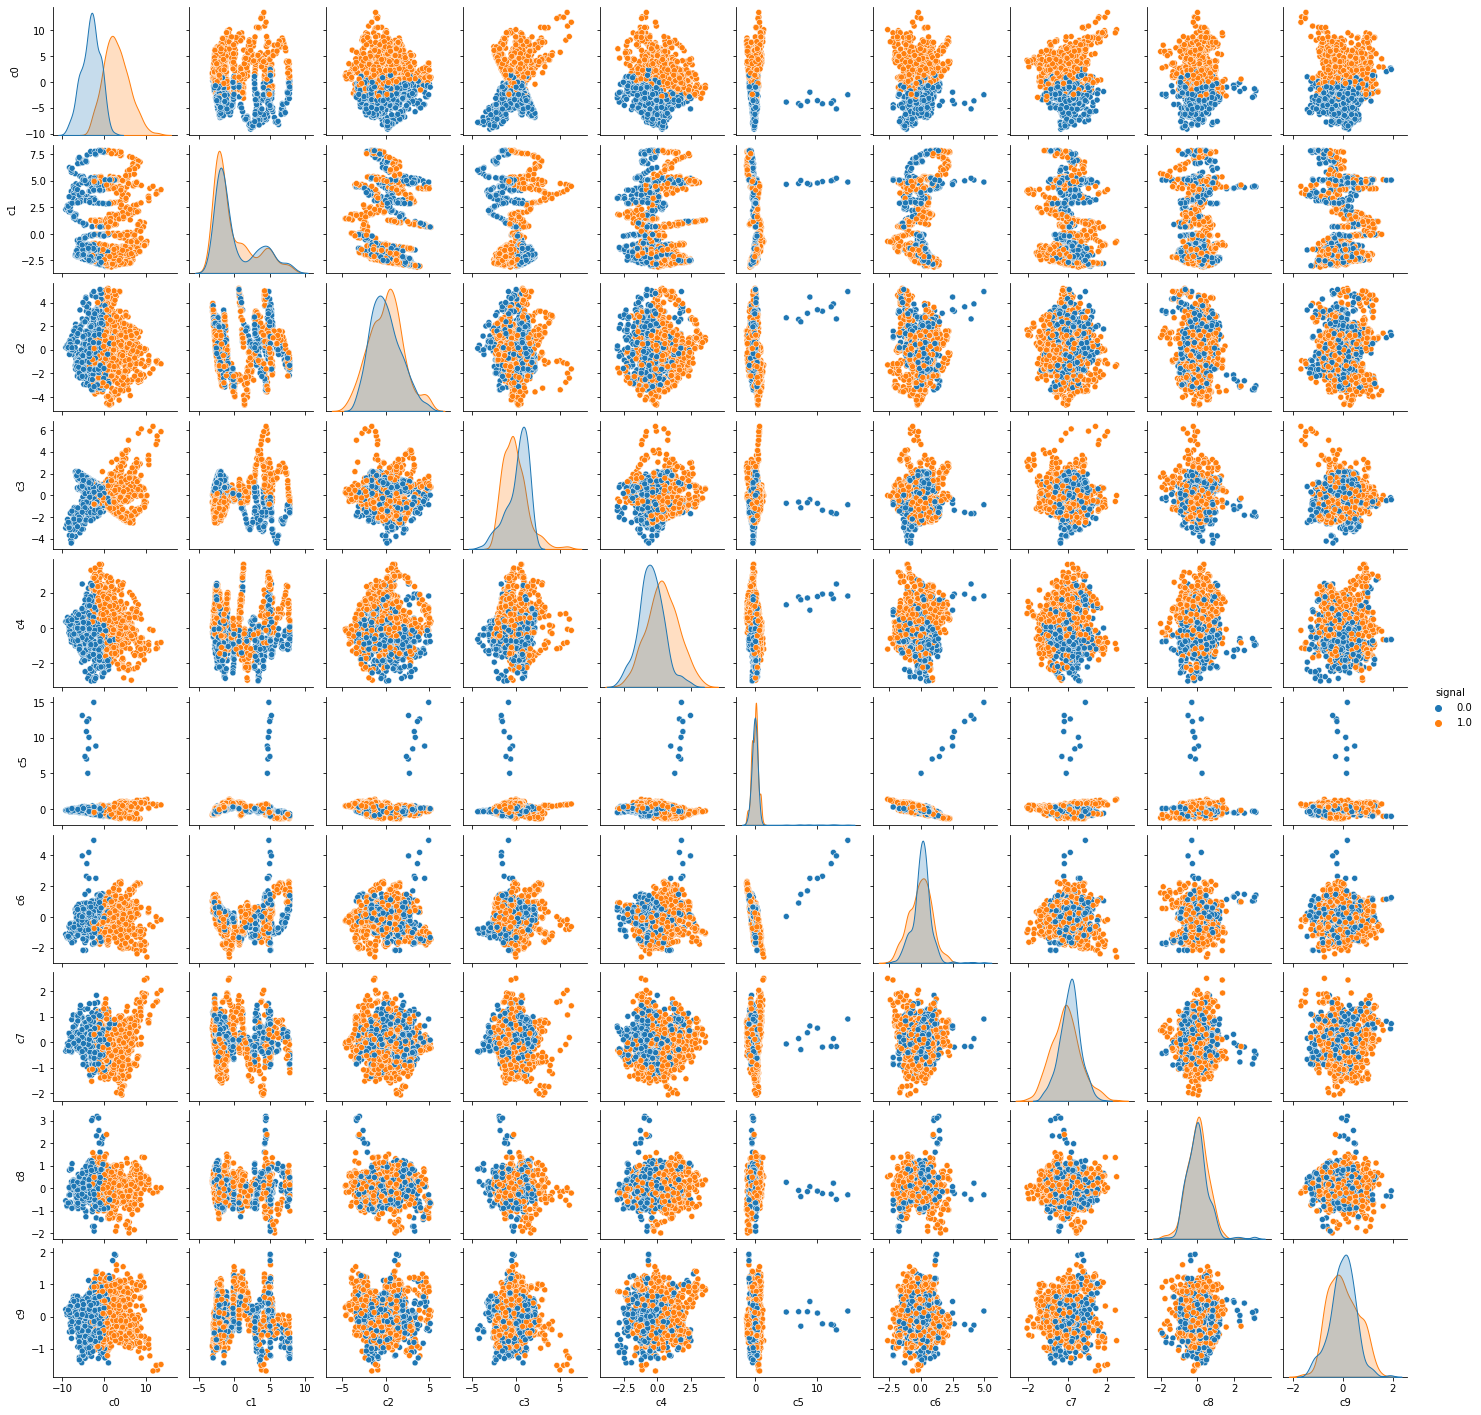

In [135]:
plotdims = 10
plot_each_rows = 1
svd_dfplot = svd_df[compressed_df_cols].iloc[:,:plotdims]
svd_dfplot['signal']=y_train
ax = sns.pairplot(svd_dfplot.iloc[::plot_each_rows,:], hue='signal', height=2)

Comparing Eigen0 with the other Eigen components... there's an obvious segregation of the different signals. datapoints from the same type of signal tend to cluster together

Hard to get the full analysis of the differences and similarities between data points while comparing these eigenvalues, manual interpretation from viewer's mind is needed to understand the relation.

In [136]:
def scatter_3D(A, elevation=30, azimuth=120):
    maxpts=1000
    fig = plt.figure(1, figsize=(9, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elevation, azim=azimuth)
    ax.set_xlabel('component 0')
    ax.set_ylabel('component 1')
    ax.set_zlabel('component 2')

    # plot subset of points
    rndpts = np.sort(np.random.choice(A.shape[0], min(maxpts,A.shape[0]), replace=False))
    coloridx = np.unique(A.iloc[rndpts]['signal'], return_inverse=True)
    colors = coloridx[1] / len(coloridx[0])   
    
    sp = ax.scatter(A.iloc[rndpts,0], A.iloc[rndpts,1], A.iloc[rndpts,2]
               ,c=colors, cmap="jet", marker='o', alpha=0.6
               ,s=50, linewidths=0.8, edgecolor='#BBBBBB')

    plt.show()

In [137]:
svd_df['signal'] = y_train
interactive(scatter_3D, A=fixed(svd_df), elevation=30, azimuth=120)

interactive(children=(IntSlider(value=30, description='elevation', max=90, min=-30), IntSlider(value=120, desc…

### T-SNE Visualization

In [138]:
eta = TSNE(n_components=2)
tsne = eta.fit_transform(svd_df[compressed_df_cols])
tsne_df = pd.DataFrame(tsne, columns=['x','y'], index=svd_df.index)

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [139]:
tsne_df['signal'] = y_train

c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\antho\anaconda3\envs\mytfenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Scatterplot of a Multiple dimension dataset reduced to 2D using t-SNE')

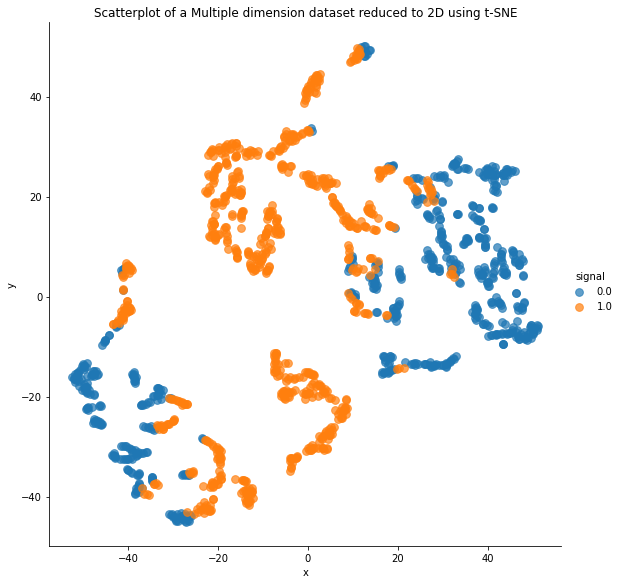

In [140]:
g = sns.lmplot('x', 'y', tsne_df, hue='signal', fit_reg=False, size=8
                ,scatter_kws={'alpha':0.7,'s':60})
g.axes.flat[0].set_title('Scatterplot of a Multiple dimension dataset reduced to 2D using t-SNE')

Another segregation minus the apparent overlaps of the blue/orange signals in the middle. Though, they can be distinguished quite well with 10 Eigenvalues compared to 37 original feats

### Test model with and without Dimensionality Reduction to see any improvement on accuracy and training time

In [141]:
import time
start_time = time.time()

scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [143]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NN', MLPClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=-1)))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('SVC', SVC()))
models.append(('NB', GaussianNB())) 

In [144]:
num_folds = 10
SEED = 43

In [145]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.545238 (0.161218)
KNN: 0.529789 (0.043697)
CART: 0.974091 (0.012107)
LDA: 0.952369 (0.015206)
NN: 0.578248 (0.053394)
AB: 0.975495 (0.010467)
GBM: 0.975495 (0.011779)
RF: 0.978996 (0.013976)
ETC: 0.974796 (0.012567)
SVC: 0.538225 (0.038148)
NB: 0.537541 (0.037241)


In [146]:
model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80, n_jobs=-1)
cv_results_XTrain= cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Time Without Dimensionality Reduction--- %s seconds ---" % (time.time() - start_time))

Time Without Dimensionality Reduction--- 18.39014458656311 seconds ---


In [147]:
start_time = time.time()
X_SVD= svd_df[compressed_df_cols].iloc[:,:10]
cv_results_SVD = cross_val_score(model, X_SVD, y_train, cv=kfold, scoring=scoring)
print("Time with Dimensionality Reduction--- %s seconds ---" % (time.time() - start_time))

Time with Dimensionality Reduction--- 0.910886287689209 seconds ---


In [148]:
print("Result without Dimensionality Reduction: %f (%f)" % (cv_results_XTrain.mean(), cv_results_XTrain.std()))
print("Result with Dimensionality Reduction: %f (%f)" % (cv_results_SVD.mean(), cv_results_SVD.std()))

Result without Dimensionality Reduction: 0.978287 (0.014816)
Result with Dimensionality Reduction: 0.965680 (0.011431)


Although the model performed better without the Dimensionality reduction... at the cost of a longer training time.

WITH the dimensionality reduction, it almost achieved the same accuracy as without the DR... and improved on cutting training time by 20 fold! another poggies